![](https://classteaching.files.wordpress.com/2017/10/words.jpg)
<h1 style="text-align: center;">Word Analysis within an Author's Collection of Works</h1>
<p>This will be a casual exploration of large bodies of text by way of data analysis in effort to glean insights into the author, the text itself, and even the use of language that not would not be afforded by other means. </p>
<h2>Data Rangling </h2>
<p>Starting with the raw text of the combined works of the author Edgar Allen Poe from volumns one through four on <a href="http://www.gutenberg.org" >Project Gutenburg</a>, it seemed looking at word counts is an obvious first step at wrapping my mind around the text as data. In effort of reducing the noise of <a href="https://en.wikipedia.org/wiki/Stop_words" >stopwords</a> along with the excitement of adding a new dimension to the represention of the data, words were also filtered based on their part of speech. Dividing all the words up based on whether they are nouns, adjectives, adverbs and verbs seemed like the logical place to start looking for word significance and meaningful relationships within the textual body. Also since the data is a combined set of works, it seemed important to note the position of a word within the orginal text, so arrays containing the postitions of each word needed to be added to the dataset of wordcounts.</p>


In [286]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import re
from plotly import tools
from plotly import offline
import plotly.plotly as py
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

offline.init_notebook_mode()

In [411]:

def mlist(row):
    try:
        ints = [int(i) for i in re.sub(r'[\]\[()]', '', row[1]).split(", ")]
    except:
        print(row)
    return ints


def llist(row):
    ints = [int(i) for i in re.sub(r'[\]\[()]', '', row[1]).split(", ")[1:]]
    return ints


def getCount(row):
    count = row[2][0]
    return count


def getDesityCounts(theRange, incrementSize, values):
    startValue = theRange[0]
    stopValue = theRange[1]
    counts = []
    interval = [startValue, startValue + incrementSize]
    i = 0
    while interval[1] <= stopValue:
        count = 0
        while i < len(values) and values[i] > interval[0] and\
                values[i] <= interval[1]:
            i = i + 1
            count = count + 1
        interval[0] = interval[1]
        interval[1] = interval[0] + incrementSize
        counts.append(count)
    return counts


def getTopAmountDataFrame(filename,amount):
    df = pd.read_csv(filename, header=None, sep="|",
                     names=['word', 'count', 'allnums','wordcount','locations'],
                     dtype={0: np.object_,
                            1: np.object_,
                            2: np.object_,
                            3: np.object_,
                            4: np.object_})
    for idx, row in df.iterrows():
        df.loc[idx,'allnums'] = mlist(row)
    for idx, row in df.iterrows():
        df.loc[idx,'wordcount'] = getCount(row)
    for idx, row in df.iterrows():
        df.loc[idx,'locations'] = np.array(llist(row)).astype(int)
        
    df.drop(['allnums', 'count'], axis=1, inplace=True)
    df.rename(columns={'wordcount': 'count'}, inplace=True)
    df = df.sort_values(by=['count', 'word'],
                        ascending=False).reset_index(drop=True)
    df = df[:amount]
    return df
def positionalPairingOfTwoArrays(rootPointArray, comparisonArray, forwardThreshold=0, backwardThreshold=0):
    result = []
    for i in range(len(rootPointArray)):
            for j in range(len(comparisonArray)):
                   root = rootPointArray[i]
                   sample = comparisonArray[j]
                   if sample <= (root + forwardThreshold) and sample > root:
                       result.append((root, sample))
                   if sample >= (root - backwardThreshold) and sample < root:
                       result.append((root, sample))

    return result

def getWordPairings(rootdf, comparisondf):
    resultdf = pd.DataFrame()
    for idxa, rootrow in rootdf.iterrows():
        for idxb, comprow in comparisondf.iterrows():
            rootPointArray = rootrow.locations
            comparisonArray = comprow.locations
            noun = rootrow.word
            adjective = comprow.word
            pairArray = positionalPairingOfTwoArrays(rootPointArray,comparisonArray,forwardThreshold=3)
            
            if len(pairArray)>0:
                columns=['noun','adjective','count', 'locations']
                row = [str(noun),str(adjective),int(len(pairArray)),np.array(pairArray)]
                dic = { columns[i]:[row[i]] for i in range(len(columns))}
                tempdf = pd.DataFrame(dic, columns=columns)
#                 print(tempdf)
                resultdf = resultdf.append(tempdf)
#                 print(resultdf)
    resultdf = resultdf.sort_values(by=['count'],
                        ascending=False).reset_index(drop=True)
    print(resultdf.head())
    return resultdf 
                   
    

In [412]:
# print(positionalPairingOfTwoArrays([0,7,14],[i for i in range(20)],3,0))
# print(positionalPairingOfTwoArrays([0,7,14],[i for i in range(20)],0,3))
# print(positionalPairingOfTwoArrays([0,7,14],[i for i in range(20)],1,1))
# resultdf = pd.DataFrame()
# columns=['noun','adjective','count', 'locations']
# row = ['time', 'little', 1, np.array([(26047, 26049)])]
# dic = { columns[i]:[row[i]] for i in range(len(columns))}
# tempdf = pd.DataFrame(dic,columns=columns)
# print(tempdf)
# resultdf =resultdf.append(tempdf)

# resultdf =resultdf.append(resultdf)
# print(resultdf)

noun_adj_df = getWordPairings(df_noun, df_adjective)
print(noun_adj_df.loc[df['noun']='man'])````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````


     noun adjective  count                                          locations
0     man     great      4  [[1398, 1400], [288537, 288539], [309688, 3096...
1   water     black      3  [[93765, 93768], [182594, 182597], [228583, 22...
2    door      open      3  [[326742, 326744], [326758, 326761], [346472, ...
3  course      many      3  [[31432, 31435], [149884, 149886], [341653, 34...
4    part    second      3  [[12194, 12197], [40816, 40819], [221074, 2210...
noun                                                       man
adjective                                                great
count                                                        4
locations    [[1398, 1400], [288537, 288539], [309688, 3096...
Name: 0, dtype: object


In [418]:
print(noun_adj_df.loc[noun_adj_df.noun =='man'])
print(noun_adj_df.loc[noun_adj_df.adjective =='great'])


    noun   adjective  count                                          locations
0    man       great      4  [[1398, 1400], [288537, 288539], [309688, 3096...
38   man      little      2                 [[25458, 25461], [335463, 335465]]
43   man     general      2               [[334365, 334368], [355327, 355330]]
240  man        good      1                                   [[23085, 23088]]
241  man        many      1                                 [[141625, 141627]]
242  man        much      1                                   [[94971, 94974]]
248  man       large      1                                 [[275230, 275233]]
256  man        long      1                                   [[61495, 61496]]
257  man       small      1                                 [[309667, 309670]]
268  man        sure      1                                   [[35064, 35067]]
270  man        dead      1                                 [[169039, 169041]]
271  man     similar      1                         

In [288]:
amount = 50
df_noun = getTopAmountDataFrame("/home/eros/data/noun_counts.txt/nouncount.txt", amount)
# df = getTopAmountDataFrame("../input/nouns-counts-in-the-works-of-edgar-allan-poe/nouncount.txt", amount)
df = df_noun
data = [go.Bar(y=df['count'],
               x=df['word'],
               marker=dict(colorscale='Viridis',
               color=df['count']))]
title = "Top " + str(amount) + " Nouns in the Works of Edgar Allen Poe"
layout = go.Layout(title=title,
                      xaxis=dict(
        autotick=False,
        ticks='outside',
        tick0=0,
        dtick=1,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
                            )
                  )
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='NounCounts.html')

<p>The noun "time" comes out on top which seems to hold some thematic significance and is closely related to the three other top fifty temporal words "day", "night", "hour" and "moment". The runner up "man" and the absence of the complement "woman" in the top fifty might suggest a masculine centric perspective within the author's works. The nouns "water", "sea", "air", "earth" and "nature" could suggest a fascination with outer natural world along with the words "mind", "idea","doubt","fact", "reason" and "attention" a contrasting interest in the inner logical and psychological world. Word pairings stand out such as life-death, head-heart, thing-nothing, question-fact, reason-doubt, and day-night. It should also be noted that most of nouns appearing in the top fifty say little by themselves as they are too generic in their meaning. Words like "man", "face", and "place" bear example to this. These nouns need enrichment from the surrounding text to come to life, enrichment most likely coming from their neighboring adjectives, to illustrate an interesting and compelling story in the minds' of the readers.</p>

In [289]:
x = np.array([])
y = np.array([])

for i in range(amount):
    locs = np.asarray(df.iloc[i]['locations'])
    y = np.append(y, df.iloc[i]['locations'])
    x = np.append(x, np.full(len(df.iloc[i]['locations'], ), i))


# Create a trace
trace = go.Scattergl(
    x=x,
    y=y,
    mode='markers',
    marker=dict(
        size='8',
        colorscale='Viridis',
        line = dict(width = 1),
        color=y
    )
)
labels = df['word']
bandxaxis = go.XAxis(
    title="",
    range=[-1, len(labels)],
    showgrid=True,
    showline=True,
    ticks="inside",
    showticklabels=True,
    tickangle=90,
    mirror=False,
    linewidth=0.0,
    ticktext=labels,
    tickvals=[i for i in range(len(labels))]
)
bandyaxis = go.YAxis(
    title="Placement of Word in Text by Word Count",
    domain=[0,365000]
)
layouttitle = "Quick and Dirty Scatter Plot of Top " + str(amount) + " Noun Placements as They Occur within the Text"
bandlayout = go.Layout(
    title=layouttitle,
    xaxis=bandxaxis,
    yaxis=bandyaxis
)
data = [trace]
fig = go.Figure(data=data, layout=bandlayout)
offline.iplot(fig, filename='NounFrequencyScatterPlot.html')

<p>Before getting too carried away with conjecture based on frequency alone it seems that the density of words should be considered in the case that some words were specific to certain stories and others defused evenly throughout Poe's works. A scatterplot graph shows that indeed some words are much more densely distributed than others but fails to illuminate the extent of those differences due to the crowding of the data points.</p>

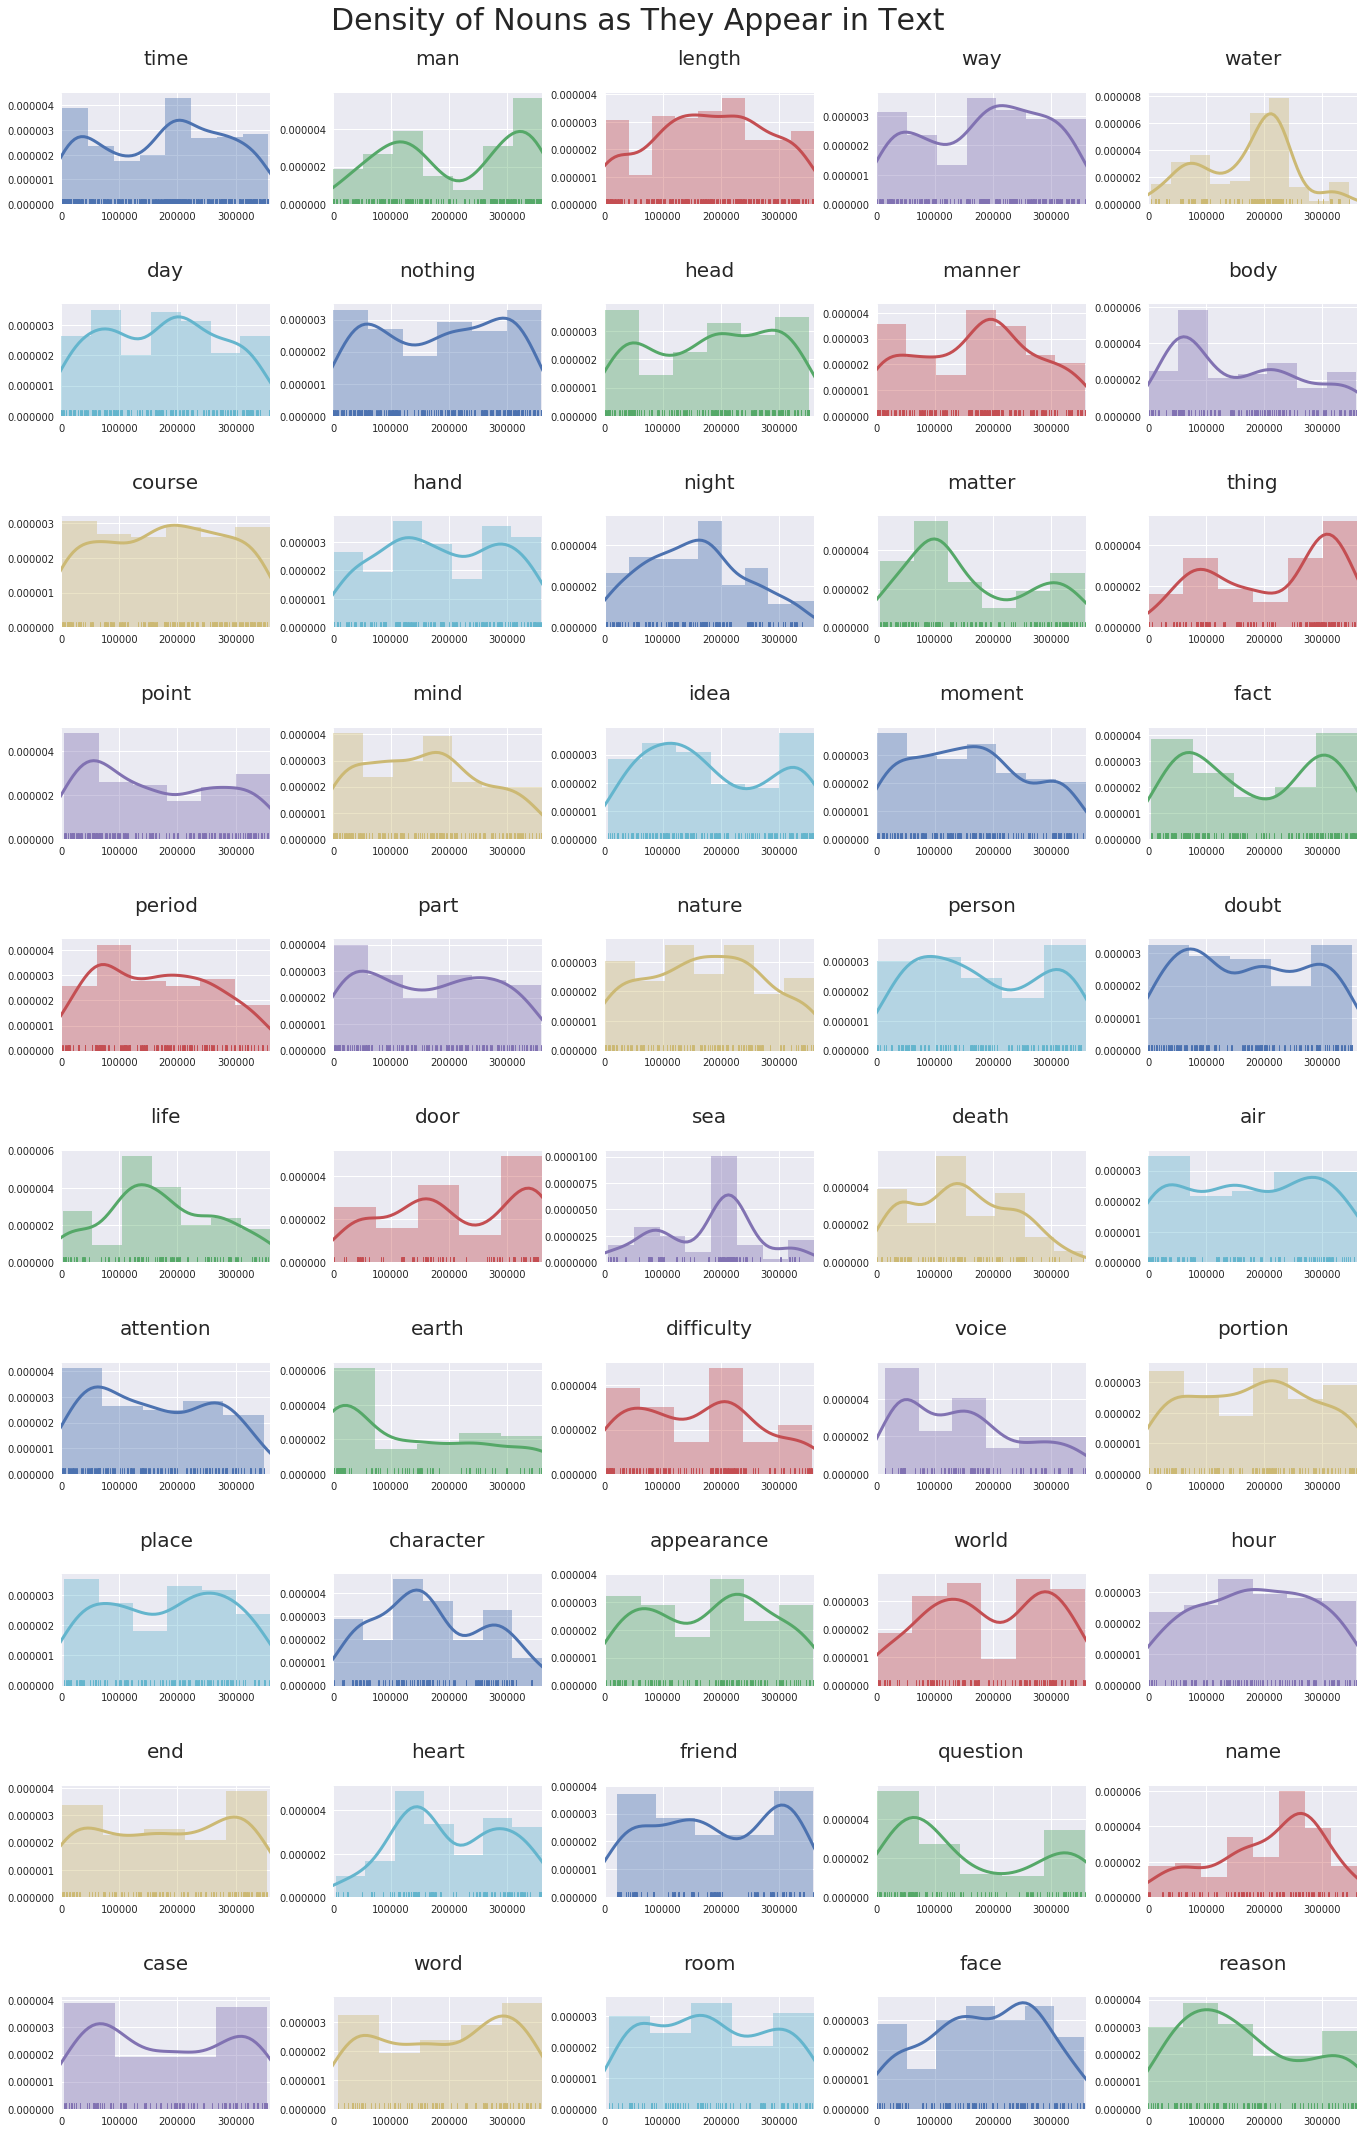

In [290]:

width = 5
height = -(-amount // width)

fig, ax = plt.subplots(figsize=(20,40), ncols=width, nrows=height)

left   =  0.0  # the left side of the subplots of the figure
right  =  0.9  # the right side of the subplots of the figure
bottom =  0.2  # the bottom of the subplots of the figure
top    =  0.9  # the top of the subplots of the figure
wspace =  0.3  # the amount of width reserved for blank space between subplots
hspace =  0.9  # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

# The amount of space above titles
y_title_margin = 1.2
colors = sns.color_palette(palette=None, n_colors=amount, desat=None)
plt.rcParams["axes.labelsize"] = 1
paper_rc = {'lines.linewidth': 3, 'lines.markersize': .2, 'xtick.labelsize': 3, 'ytick.labelsize': 3, 'axes.labelsize': 36,}                  
sns.set_context(rc = paper_rc)  
plt.suptitle("Density of Nouns as They Appear in Text", fontsize=30, y=.93 , x=.4)
plt.gca().set_xlim(0,360000)
index = 0
for i in range(height):
    for j in range(width):
        index = i * width + j
        ax[i][j].set_title(df.word[index], y = y_title_margin, fontsize=20)
        g = sns.distplot(df.iloc[index]['locations'], kde=True, hist=True ,rug=True,  ax=ax[i][j], color=colors[index])
        g.axes.set_xlim(0,360000)
        g.tick_params(labelsize=10)
        g.lines


<p>The density plots reveal that some words have clear isolated significance such as "sea" and "water" while others are more evenly distributed throughout the entirety of the works like "time", "nothing", and "head". Also some correlation between nouns are suggested by the shape of the graphs such as in the clear case between the aforementioned nouns "sea" and "water". Before getting carried away with into correlation analysis between these sometimes all too generic nouns, first the adjectives that color them should be given some consideration.</p>

In [291]:
amount = 50
df_adjective = getTopAmountDataFrame("/home/eros/data/adjective_counts.txt/adjectivecount.txt", amount)
# df = getTopAmountDataFrame("../input/adjective-counts-in-the-works-of-edgar-allan-poe/adjectivecount.txt", amount)
df = df_adjective
data = [go.Bar(y=df['count'],
               x=df['word'],
               marker=dict(colorscale='Viridis',
               color=df['count']))]
title = "Top " + str(amount) + " Adjectives in the Works of Edgar Allen Poe"
layout = go.Layout(title=title,
                      xaxis=dict(
        autotick=False,
        ticks='outside',
        tick0=0,
        dtick=1,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
                            )
                  )
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='NounCounts.html')

<p>Again it seems the more generic a word the more often it is used within the text. But here, in the adjectives even more than the nouns, dichotomous pairing of the most used words is also evident. Some examples of these dichotomous pairs are: great-small, first-last, black-white, and young-old. Since every adjective is coupled with a noun it would be interesting to note how many of the top fifty adjectives are paired with the top fifty nouns. But first a look at the density distribution of the adjectives within the text.</p>

In [292]:
figures = []
width = 5
height = -(-amount // width)
fig = tools.make_subplots(rows=height,
                          cols=width,
                          subplot_titles=labels, 
                          vertical_spacing=0.05,
                          horizontal_spacing=0.02,
                          print_grid=False)
for index, row in df.iterrows():
    name = row[0]
    values = row[2]
    theRange = [0, 370000]
    incrementSize = 10000
    densities = getDesityCounts(theRange, incrementSize, values)
    trace = go.Scatter(
        x=[i for i in range(len(densities))],
        y=densities,
    )
    data = trace
    figures.append(data)

for i in range(len(figures)):
    fig.append_trace(figures[i],(i // width) + 1 , (i % width) + 1)
title = "Density of Each Word Per Count of " + str(incrementSize) + " Word Intervals"
fig['layout'].update(height=20 * amount, width=800, title=title, showlegend=False)
# offline.iplot(fig, filename='NounDensityGrapths.html')   


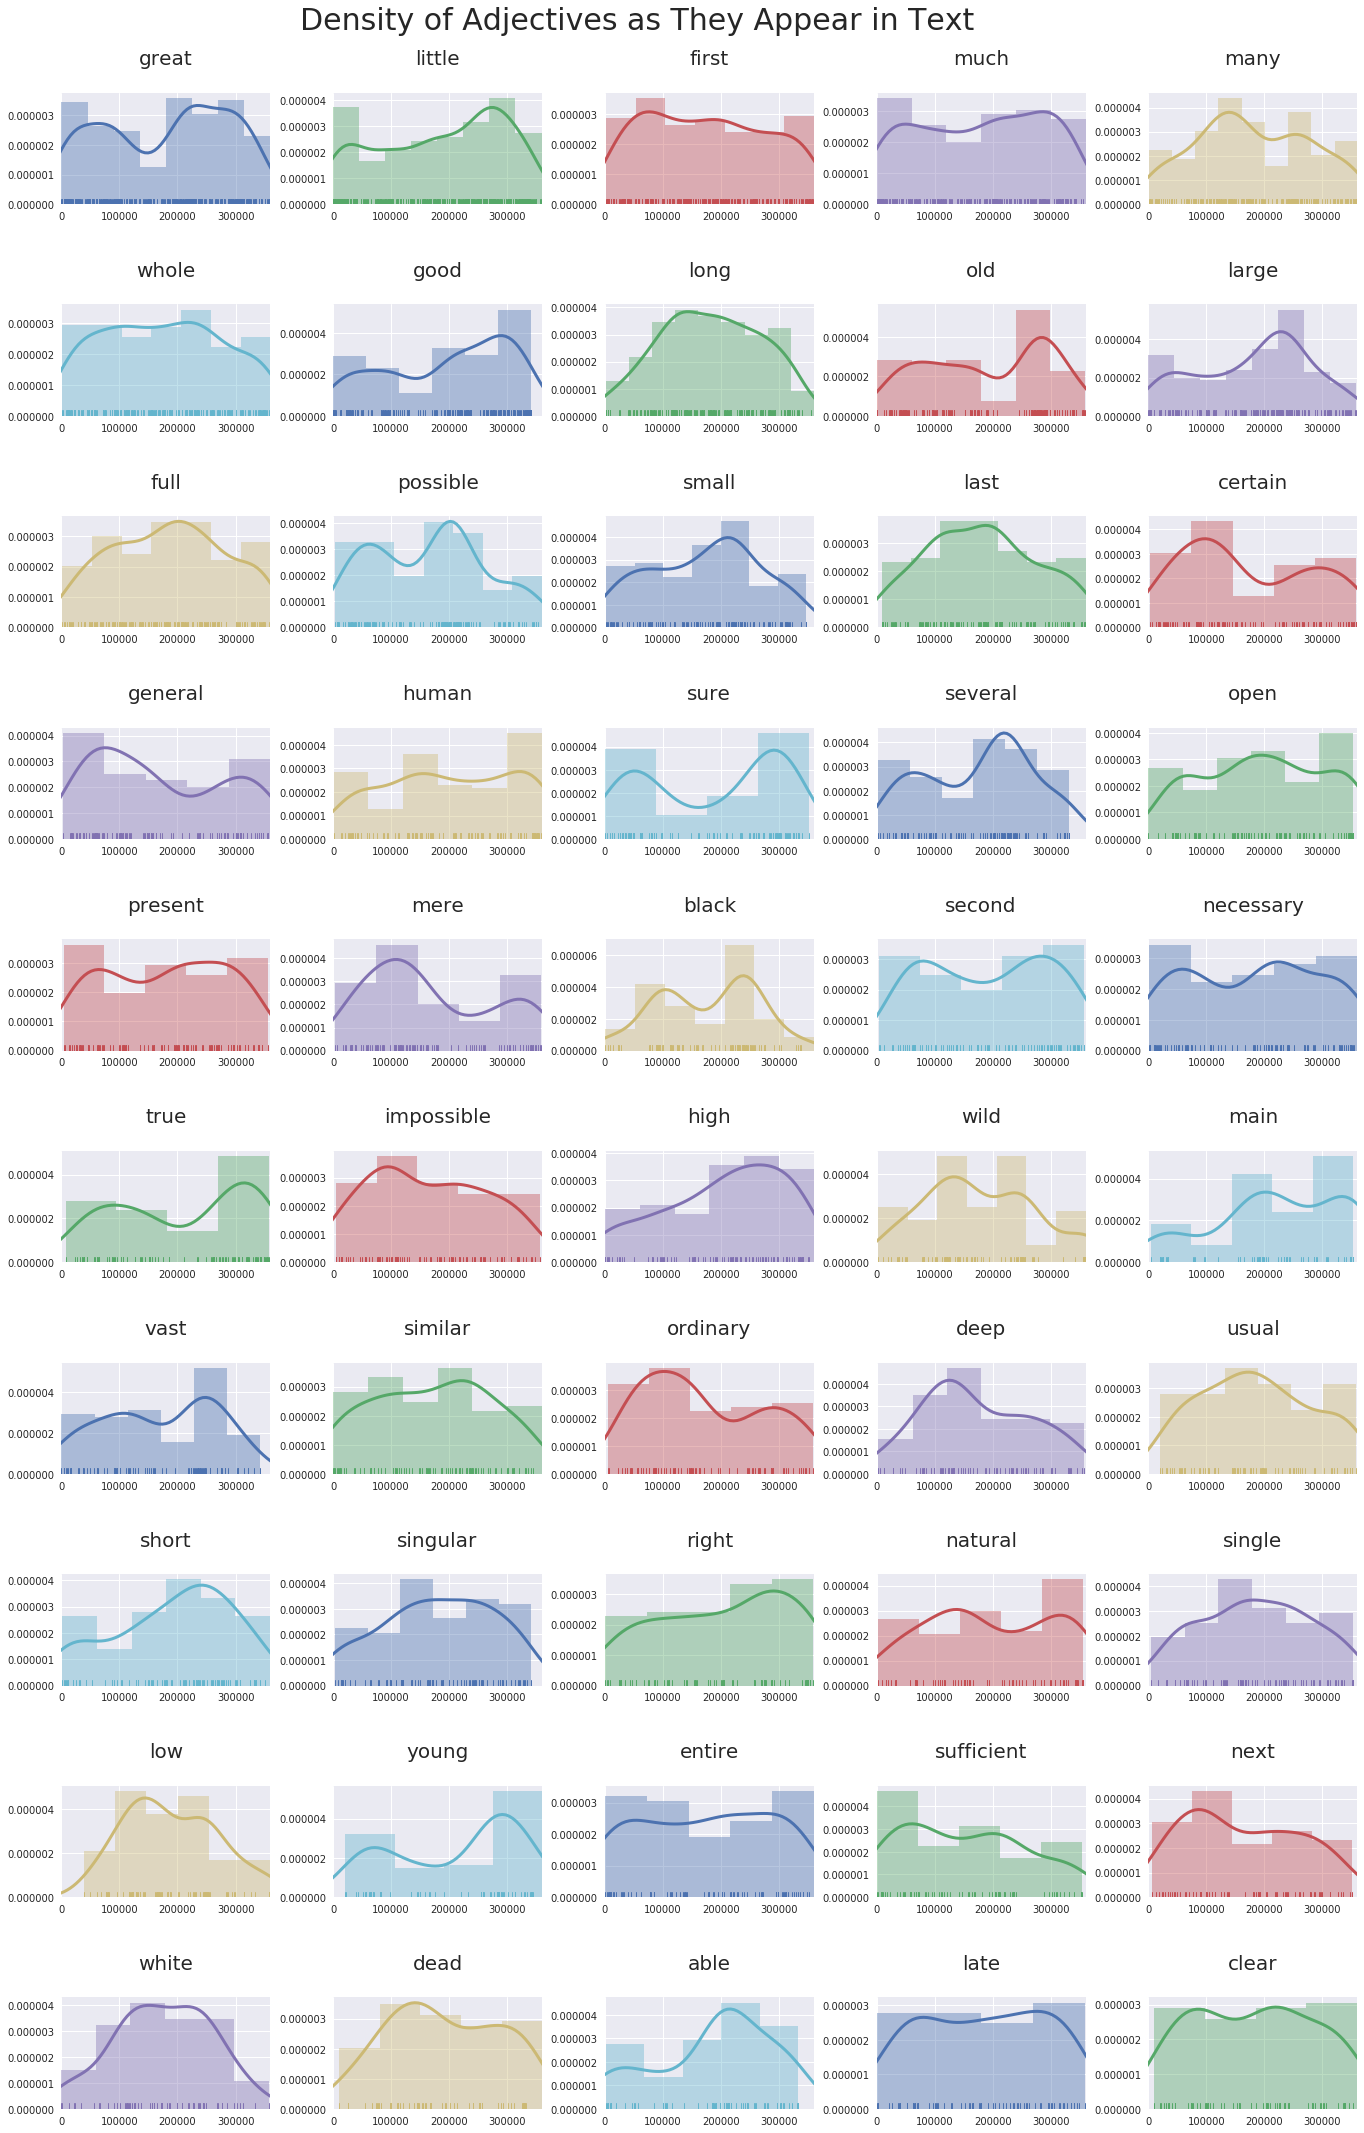

In [293]:

width = 5
height = -(-amount // width)

fig, ax = plt.subplots(figsize=(20,40), ncols=width, nrows=height)

left   =  0.0  # the left side of the subplots of the figure
right  =  0.9  # the right side of the subplots of the figure
bottom =  0.2  # the bottom of the subplots of the figure
top    =  0.9  # the top of the subplots of the figure
wspace =  0.3  # the amount of width reserved for blank space between subplots
hspace =  0.9  # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

# The amount of space above titles
y_title_margin = 1.2
colors = sns.color_palette(palette=None, n_colors=amount, desat=None)
plt.rcParams["axes.labelsize"] = 1
paper_rc = {'lines.linewidth': 3, 'lines.markersize': .2, 'xtick.labelsize': 3, 'ytick.labelsize': 3, 'axes.labelsize': 36,}                  
sns.set_context(rc = paper_rc)  
plt.suptitle("Density of Adjectives as They Appear in Text", fontsize=30, y=.93 , x=.4)
plt.gca().set_xlim(0,360000)
index = 0
for i in range(height):
    for j in range(width):
        index = i * width + j
        ax[i][j].set_title(df.word[index], y = y_title_margin, fontsize =20)
        g = sns.distplot(df.iloc[index]['locations'], kde=True, hist=True ,rug=True,  ax=ax[i][j], color=colors[index])
        g.axes.set_xlim(0,360000)
        g.tick_params(labelsize=10)
